<a href="https://colab.research.google.com/github/Simon-creator-jara/Inteligencia_artificial/blob/main/Practica_netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
##Importamos librerías 
import numpy as np 
import pandas as pd

#Gráficos
import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D

!pip install kmodes
from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_score


#Advertencias 
import warnings
warnings.filterwarnings('ignore')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Configurar los gráficos
plt.rcParams['figure.figsize']=(16,9)
plt.style.use('ggplot')

In [ ]:
datos=pd.read_csv('netflix_titles.csv')
datos.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
datos['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [ ]:
datos['country'].unique()

array(['United States', 'South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kin

In [ ]:
datos.groupby('country').size()

country
, France, Algeria                                       1
, South Korea                                           1
Argentina                                              56
Argentina, Brazil, France, Poland, Germany, Denmark     1
Argentina, Chile                                        2
                                                       ..
Venezuela                                               1
Venezuela, Colombia                                     1
Vietnam                                                 7
West Germany                                            1
Zimbabwe                                                1
Length: 748, dtype: int64

In [ ]:
datos.groupby('duration').size()

duration
1 Season      1793
10 Seasons       7
10 min           1
100 min        108
101 min        116
              ... 
95 min         137
96 min         130
97 min         146
98 min         120
99 min         118
Length: 220, dtype: int64

In [ ]:
datos.groupby('listed_in').size()

listed_in
Action & Adventure                                              128
Action & Adventure, Anime Features                                1
Action & Adventure, Anime Features, Children & Family Movies      4
Action & Adventure, Anime Features, Classic Movies                2
Action & Adventure, Anime Features, Horror Movies                 1
                                                               ... 
TV Horror, TV Mysteries, Teen TV Shows                            1
TV Horror, Teen TV Shows                                          2
TV Sci-Fi & Fantasy, TV Thrillers                                 1
TV Shows                                                         16
Thrillers                                                        65
Length: 514, dtype: int64

In [17]:
datos['listed_in'].unique()

array(['Documentaries', 'International TV Shows, TV Dramas, TV Mysteries',
       'Crime TV Shows, International TV Shows, TV Action & Adventure',
       'Docuseries, Reality TV',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'TV Dramas, TV Horror, TV Mysteries', 'Children & Family Movies',
       'Dramas, Independent Movies, International Movies',
       'British TV Shows, Reality TV', 'Comedies, Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Dramas, International Movies',
       'Children & Family Movies, Comedies',
       'British TV Shows, Crime TV Shows, Docuseries',
       'TV Comedies, TV Dramas', 'Documentaries, International Movies',
       'Crime TV Shows, Spanish-Language TV Shows, TV Dramas',
       'Thrillers',
       'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
       'International TV Shows, TV Action & Adventure, TV Dramas',
       'Comedies, International Movies',
       'Comedies, 

In [16]:
datos_def=datos.drop(['show_id','title','director','cast','date_added','release_year','rating','description'],1)

In [24]:
datos_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   type       8807 non-null   object
 1   country    7976 non-null   object
 2   duration   8804 non-null   object
 3   listed_in  8807 non-null   object
dtypes: object(4)
memory usage: 275.3+ KB


In [25]:
datos_def['country']=datos_def['country'].fillna(value='No definido')
datos_def['duration']=datos_def['duration'].fillna(value='120 min')

In [26]:
datos_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   type       8807 non-null   object
 1   country    8807 non-null   object
 2   duration   8807 non-null   object
 3   listed_in  8807 non-null   object
dtypes: object(4)
memory usage: 275.3+ KB


In [ ]:
modeloKmodes.

Text(0.5, 1.0, 'Indice de silhouette')

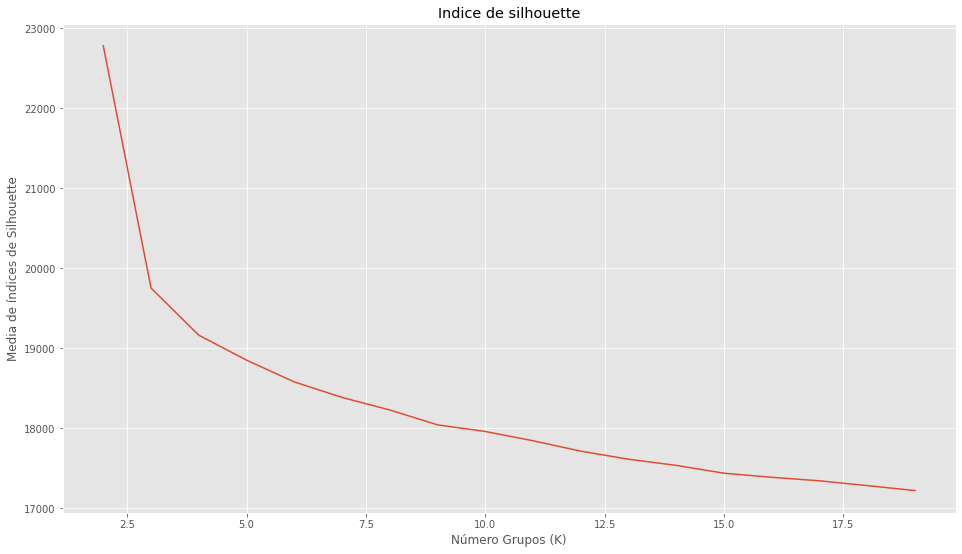

In [28]:
#Método de silhouette
numeroCluster = range(2,20)
valoresMedios =[]

for n_clusters in numeroCluster:
  modeloKmodes = KModes(n_clusters = n_clusters)
  labels = modeloKmodes.fit_predict(datos_def)
  
  valoresMedios.append(modeloKmodes.cost_)

plt.plot(numeroCluster, valoresMedios)
plt.xlabel('Número Grupos (K)')
plt.ylabel('Media de índices de Silhouette')
plt.title('Indice de silhouette')

In [30]:
kmodes1 = KModes(n_clusters=2).fit(datos_def)
centroides1 = kmodes1.cluster_centroids_
centroides1

array([['Movie', 'United States', '1 Season', 'Documentaries'],
       ['Movie', 'India', '94 min', 'Dramas, International Movies']],
      dtype='<U28')